In [1]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential, Model

In [2]:
image_size = [227, 227]
model = VGG16(input_shape = image_size+[3], include_top=False, weights = 'imagenet')

In [3]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 227, 227, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 227, 227, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 227, 227, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 113, 113, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 113, 113, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 113, 113, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [4]:
for layers in model.layers:
    layers.trainable = False

In [5]:
final_arc = Model(inputs = model.input, outputs = Dense(1, activation = "sigmoid")(Flatten()(model.output)))

In [6]:
final_arc.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 227, 227, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 227, 227, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 227, 227, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 113, 113, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 113, 113, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 113, 113, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [7]:
final_arc.compile(loss= "binary_crossentropy", optimizer = "Adam", metrics = ['accuracy'])

In [8]:
train_path = 'E:/CNN Personal Practise/Dogs vs Cats/train'
test_path = 'E:/CNN Personal Practise/Dogs vs Cats/test'

In [10]:
train_augment = ImageDataGenerator(rescale=1./255, zoom_range = 0.2, shear_range = 0.3, horizontal_flip = True)
test_augment = ImageDataGenerator(rescale=1./255)

In [11]:
final_train = train_augment.flow_from_directory(train_path, target_size =(227,227), batch_size = 35, class_mode = "binary")

Found 20000 images belonging to 2 classes.


In [12]:
final_test = test_augment.flow_from_directory(test_path, target_size =(227,227), batch_size = 25, class_mode = "binary")

Found 5000 images belonging to 2 classes.


In [20]:
vgg16 = final_arc.fit_generator(final_train, epochs = 10, steps_per_epoch = 20, validation_data = final_train)

<ipython-input-20-3993241100f6>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  vgg16 = final_arc.fit_generator(final_train, epochs = 10, steps_per_epoch = 20, validation_data = final_train)


Epoch 1/10
20/20 [==============================] - 1381s 73s/step - loss: 0.2842 - accuracy: 0.8743 - val_loss: 0.2488 - val_accuracy: 0.8940
Epoch 2/10
20/20 [==============================] - 1025s 54s/step - loss: 0.2686 - accuracy: 0.8843 - val_loss: 0.2268 - val_accuracy: 0.9078
Epoch 3/10
20/20 [==============================] - 972s 51s/step - loss: 0.1855 - accuracy: 0.9257 - val_loss: 0.2159 - val_accuracy: 0.9143
Epoch 4/10
20/20 [==============================] - 976s 51s/step - loss: 0.2322 - accuracy: 0.9114 - val_loss: 0.2197 - val_accuracy: 0.9071
Epoch 5/10
20/20 [==============================] - 975s 51s/step - loss: 0.2331 - accuracy: 0.9043 - val_loss: 0.2124 - val_accuracy: 0.9125
Epoch 6/10
20/20 [==============================] - 1178s 62s/step - loss: 0.2120 - accuracy: 0.9071 - val_loss: 0.2128 - val_accuracy: 0.9141
Epoch 7/10
20/20 [==============================] - 1369s 72s/step - loss: 0.2125 - accuracy: 0.8986 - val_loss: 0.2118 - val_accuracy: 0.9142
Ep

In [22]:
final_arc.save('vgg16_cats_vs_dogs.h5')

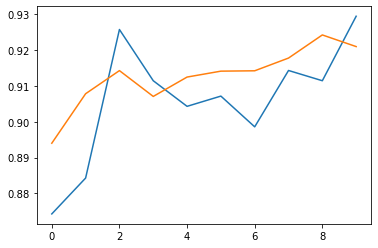

In [23]:
import matplotlib.pyplot as plt
plt.plot(vgg16.history['accuracy'])
plt.plot(vgg16.history['val_accuracy'])

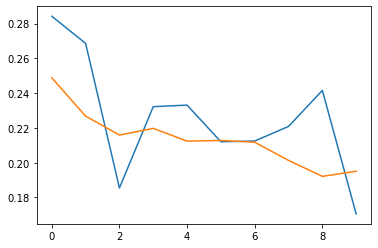

In [24]:
import matplotlib.pyplot as plt
plt.plot(vgg16.history['loss'])
plt.plot(vgg16.history['val_loss'])

In [25]:
import numpy as np
from tensorflow.keras.preprocessing import image
img = image.load_img('E:/CNN Personal Practise/Dogs vs Cats/test/cats/cat.10.jpg', target_size=(227,227))

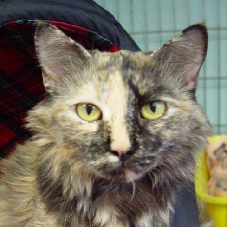

In [33]:
img

In [29]:
image_Array = image.img_to_array(img)
image_Array = np.expand_dims(image_Array/255, axis=0)
final_arc.predict(image_Array)

1/1 [==============================] - 0s 138ms/step


array([[0.00023767]], dtype=float32)

In [35]:
import numpy as np
from tensorflow.keras.preprocessing import image
img1 = image.load_img('E:/CNN Personal Practise/Dogs vs Cats/test/dogs/dog.310.jpg', target_size=(227,227))

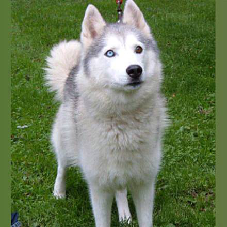

In [36]:
img1

In [37]:
image_Array = image.img_to_array(img1)
image_Array = np.expand_dims(image_Array/255, axis=0)
final_arc.predict(image_Array)

1/1 [==============================] - 0s 74ms/step


array([[0.9436068]], dtype=float32)